In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split

In [2]:
data= pd.read_csv('../week 1 task/cleaned_data.csv', index_col=0)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3452 entries, 1 to 4423
Data columns (total 95 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Marital status                          3452 non-null   int64  
 1   Application order                       3452 non-null   int64  
 2   Daytime/evening attendance              3452 non-null   int64  
 3   Previous qualification                  3452 non-null   int64  
 4   Previous qualification (grade)          3452 non-null   float64
 5   Nationality                             3452 non-null   int64  
 6   Admission grade                         3452 non-null   float64
 7   Displaced                               3452 non-null   int64  
 8   Educational special needs               3452 non-null   int64  
 9   Debtor                                  3452 non-null   int64  
 10  Tuition fees up to date                 3452 non-null   int64  
 

In [4]:
#Checking the variance of the numeric variables
numeric = ['Age at enrollment','Previous qualification (grade)','Admission grade', 'Unemployment rate','Inflation rate','GDP','Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)']

In [5]:
school_df = data.copy()

#  Feature Creation

 Develop new features based on domain knowledge (e.g., study time per credit
)
• Create interaction terms between existing features
• Implement polynomial features for numerical variables
• Develop time-based features (e.g., time since last ex

In [6]:
school_df['Curricular units (Average grade)']	= (school_df['Curricular units 1st sem (grade)'] + school_df['Curricular units 2nd sem (grade)'])/2
school_df['Total Curricular units (enrolled)'] = school_df['Curricular units 1st sem (enrolled)']	+ school_df['Curricular units 2nd sem (enrolled)']
school_df['Total Curricular units (evaluations)'] = school_df['Curricular units 1st sem (evaluations)'] + school_df['Curricular units 2nd sem (evaluations)']
school_df['Total Curricular units (approved)'] = school_df['Curricular units 2nd sem (approved)']	+ school_df['Curricular units 2nd sem (approved)']
school_df['Completion_Rate_1st'] = school_df['Curricular units 1st sem (approved)'] / school_df['Curricular units 1st sem (enrolled)']
school_df['Completion_Rate_2nd'] = school_df['Curricular units 2nd sem (approved)'] / school_df['Curricular units 2nd sem (enrolled)']





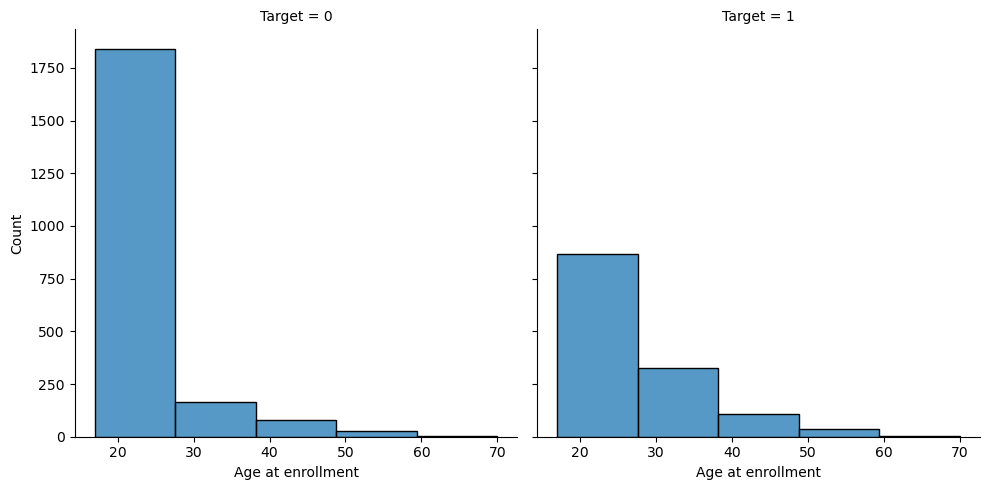

In [7]:
sns.displot(data=school_df,x='Age at enrollment',col='Target',binwidth=10)
plt.show()

In [8]:
school_df['Age_cut'] = pd.qcut(school_df['Age at enrollment'],6)
school_df.groupby('Age_cut')['Target'].mean()

C:\Users\USER\AppData\Local\Temp\ipykernel_15896\3239742756.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  school_df.groupby('Age_cut')['Target'].mean()


Age_cut
(16.999, 18.0]    0.224390
(18.0, 19.0]      0.261735
(19.0, 20.0]      0.281755
(20.0, 22.0]      0.384401
(22.0, 30.0]      0.639576
(30.0, 70.0]      0.611208
Name: Target, dtype: float64

In [9]:
school_df.loc[school_df['Age at enrollment']<=18, 'Age at enrollment']=0
school_df.loc[(school_df['Age at enrollment']>18) & (school_df['Age at enrollment']<=19), 'Age at enrollment']=1
school_df.loc[(school_df['Age at enrollment']>19) & (school_df['Age at enrollment']<=20), 'Age at enrollment']=2
school_df.loc[(school_df['Age at enrollment']>20) & (school_df['Age at enrollment']<=22), 'Age at enrollment']=3
school_df.loc[(school_df['Age at enrollment']>22) & (school_df['Age at enrollment']<=30), 'Age at enrollment']=4
school_df.loc[(school_df['Age at enrollment']>30) & (school_df['Age at enrollment']<=70), 'Age at enrollment']=5

In [11]:
school_df.drop('Age_cut',axis=1,inplace=True)
school_df.groupby('Age at enrollment')['Target'].mean()

Age at enrollment
0    0.224390
1    0.261735
2    0.281755
3    0.384401
4    0.639576
5    0.611208
Name: Target, dtype: float64

In [12]:
# Create interaction terms
school_df['Completion_Grade_Interaction'] = school_df['Completion_Rate_1st'] * school_df['Admission grade']
school_df['Completion_Age_Interaction'] = school_df['Completion_Rate_1st'] * school_df['Age at enrollment']
school_df['Grade_Interaction'] = school_df['Admission grade'] * school_df['Previous qualification (grade)']
school_df['Previous_Age_Interaction'] = school_df['Previous qualification (grade)'] * school_df['Age at enrollment']
school_df['Scholarship_Completion_Interaction'] = school_df['Scholarship holder'] * school_df['Completion_Rate_1st']

# Display the new interaction features
print(school_df[['Completion_Rate_1st', 'Completion_Grade_Interaction', 
                 'Completion_Age_Interaction', 'Grade_Interaction', 
                 'Previous_Age_Interaction', 'Scholarship_Completion_Interaction']])

      Completion_Rate_1st  Completion_Grade_Interaction  \
1                1.000000                    142.500000   
2                0.000000                      0.000000   
3                1.000000                    119.600000   
4                0.833333                    117.916667   
5                1.000000                    114.800000   
...                   ...                           ...   
4419             0.833333                    101.833333   
4420             1.000000                    119.000000   
4421             1.000000                    149.500000   
4422             1.000000                    153.800000   
4423             1.000000                    152.000000   

      Completion_Age_Interaction  Grade_Interaction  Previous_Age_Interaction  \
1                       1.000000           22800.00                     160.0   
2                       0.000000           15225.60                     122.0   
3                       2.000000           14591

In [12]:
school_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3452 entries, 1 to 4423
Columns: 102 entries, Marital status to Completion_Rate_2nd
dtypes: float64(86), int64(15), object(1)
memory usage: 2.7+ MB


In [13]:
numeric = [
'Previous qualification (grade)',
'Admission grade',
'Curricular units 1st sem (enrolled)',
'Curricular units 1st sem (evaluations)',
'Curricular units 1st sem (approved)',
'Curricular units 1st sem (grade)',
'Curricular units 2nd sem (enrolled)',
'Curricular units 2nd sem (evaluations)',
'Curricular units 2nd sem (approved)',
'Curricular units 2nd sem (grade)',
'Unemployment rate',
'Inflation rate',
'GDP','Completion_Rate_2nd',
'Completion_Rate_1st',
'Total Curricular units (approved)',
'Total Curricular units (evaluations)',
'Total Curricular units (enrolled)',
'Curricular units (Average grade)',
'Completion_Rate_1st', 
'Completion_Grade_Interaction', 
'Completion_Age_Interaction',
'Grade_Interaction', 
'Previous_Age_Interaction', 
'Scholarship_Completion_Interaction']

In [14]:
n = school_df[numeric]
y = school_df['Target']

# train_dataset, test_dataset = train_test_split(X, y, stratify=y, random_state=42)

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Define a range of degrees to test
degrees = [1, 2, 3, 4]
scores = []

# Evaluate each degree using cross-validation
for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    n_poly = poly.fit_transform(n)
    
    model = LinearRegression()
    cv_score = cross_val_score(model, n_poly, y, cv=3)  # 3-fold cross-validation
    scores.append(np.mean(cv_score))

# Display results
for degree, score in zip(degrees, scores):
    print(f'Degree: {degree}, Cross-Validation Score: {score:.4f}')

Degree: 1, Cross-Validation Score: 0.6543
Degree: 2, Cross-Validation Score: 0.6487
Degree: 3, Cross-Validation Score: -93.8183
Degree: 4, Cross-Validation Score: -1006.3160


In [ ]:
dd

### Feature Transformation
• Apply log transformation to skewed numerical features
• Bin continuous variables into categorical ones where appropriate
• Standardize numerical features

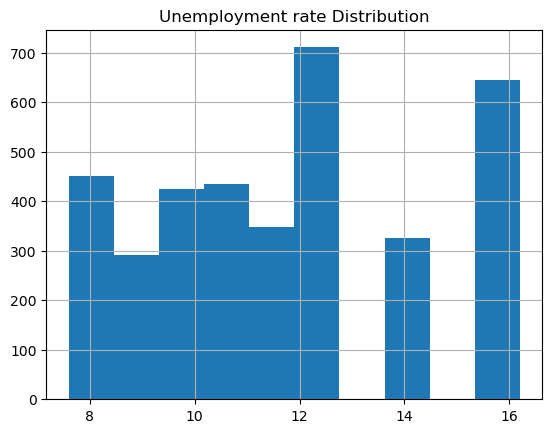

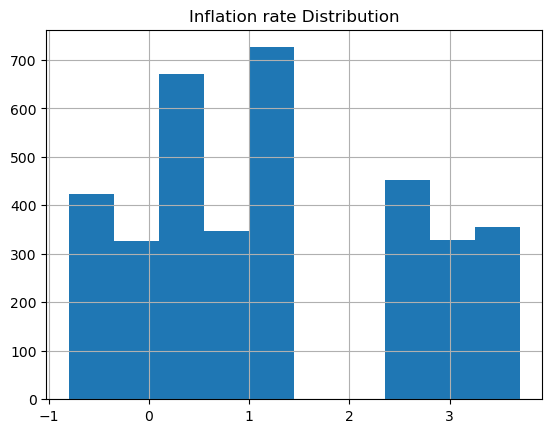

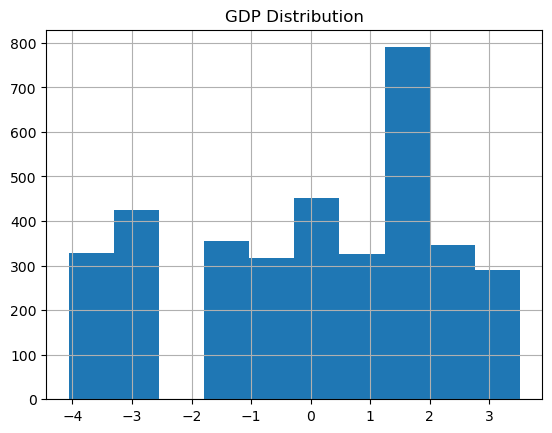

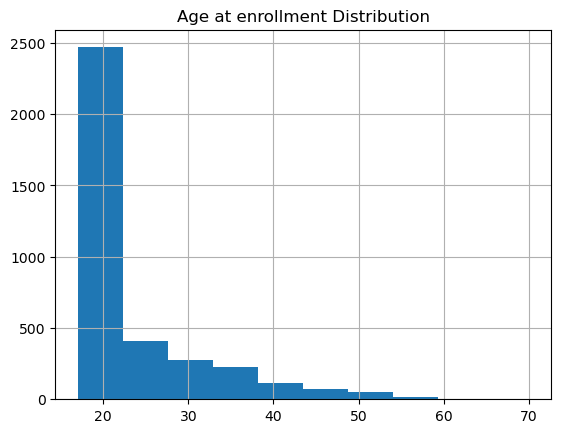

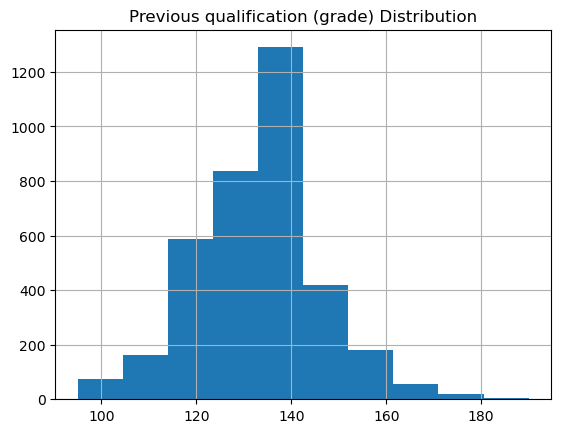

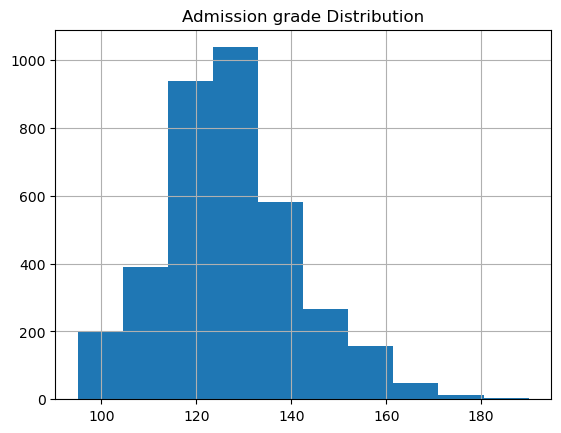

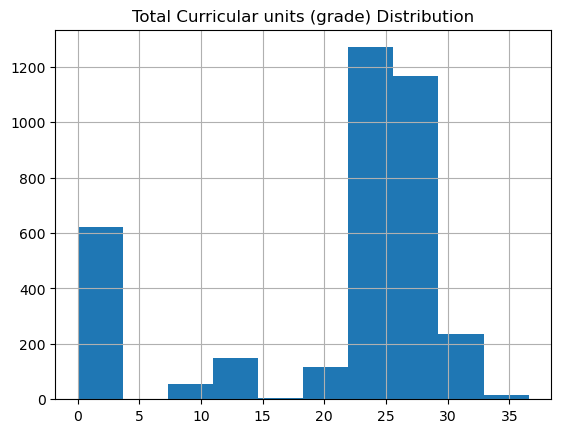

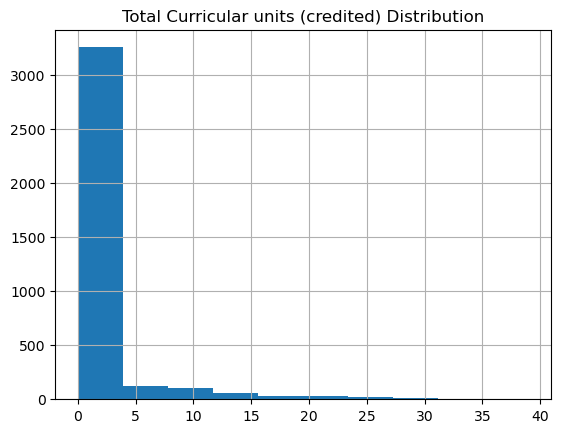

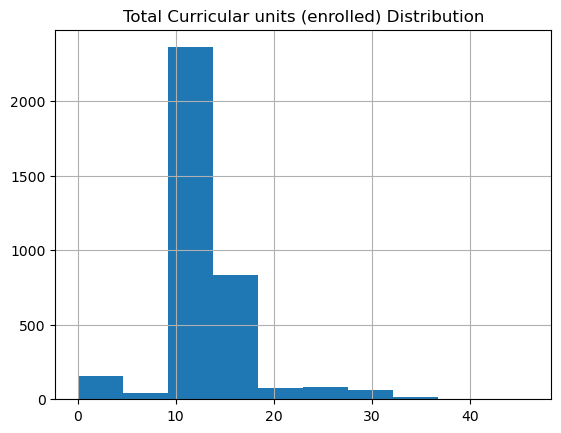

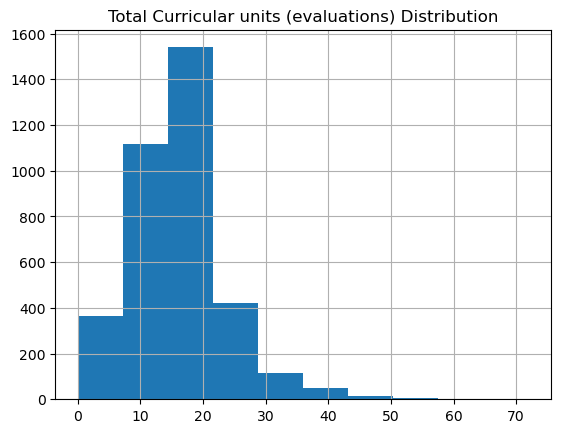

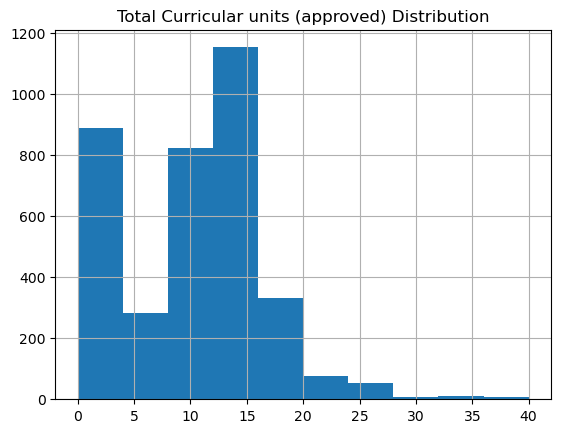

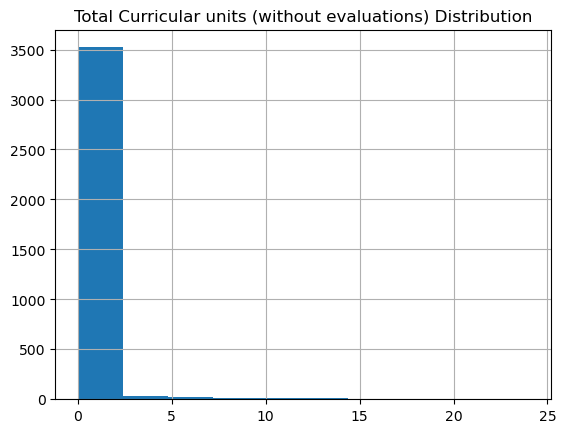

In [11]:
# Checking the distribution of the numeric variables
for numeric in num:
    school_df[f'{numeric}'].hist()
    plt.title(f'{numeric} Distribution')
    plt.show()

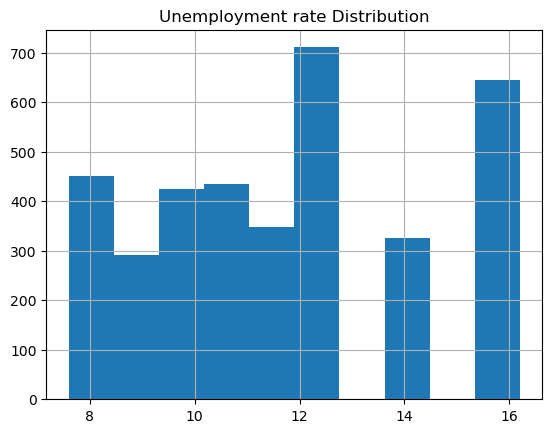

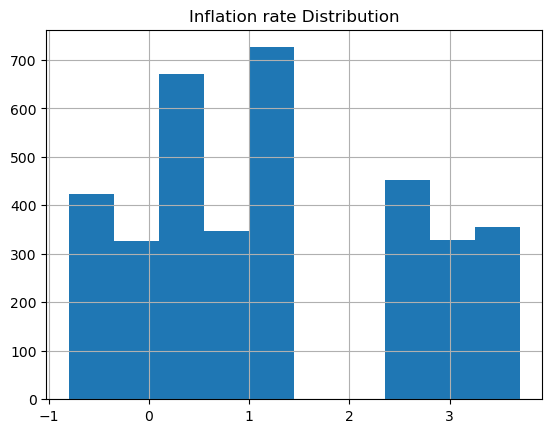

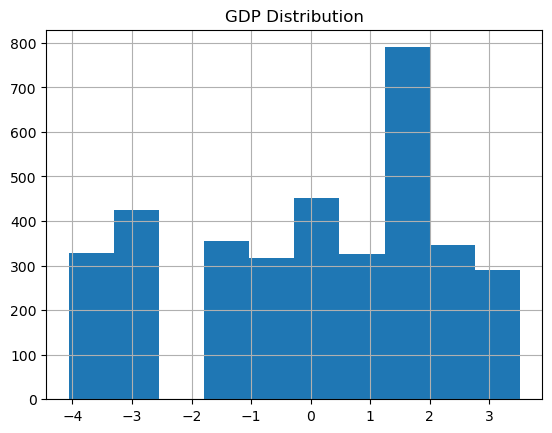

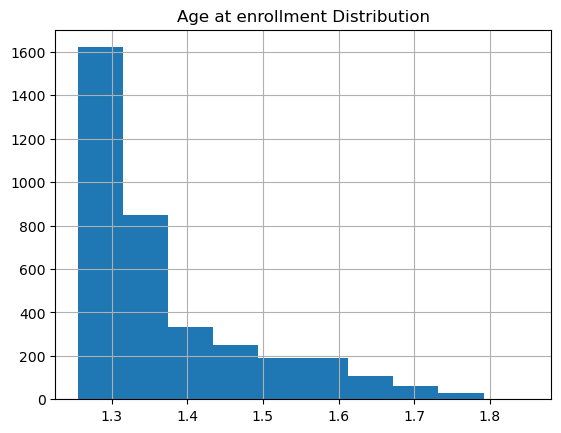

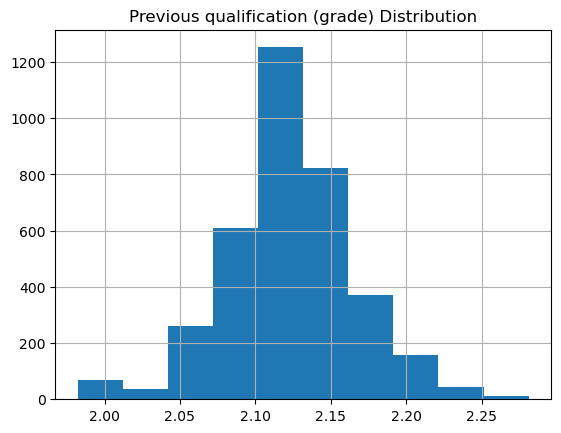

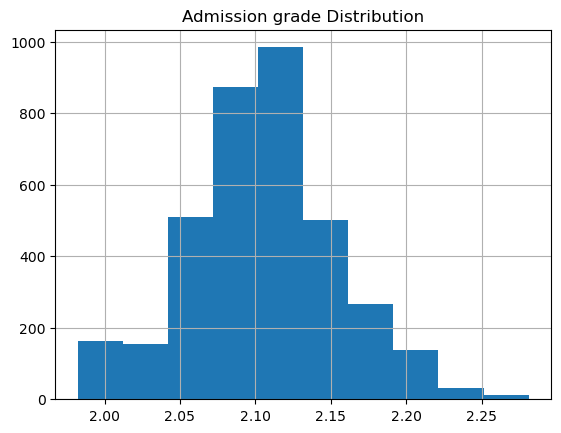

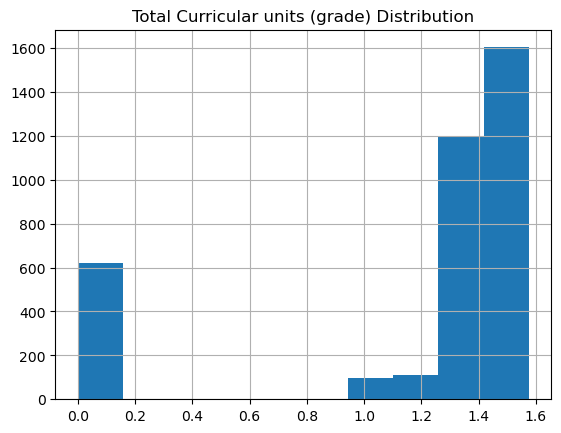

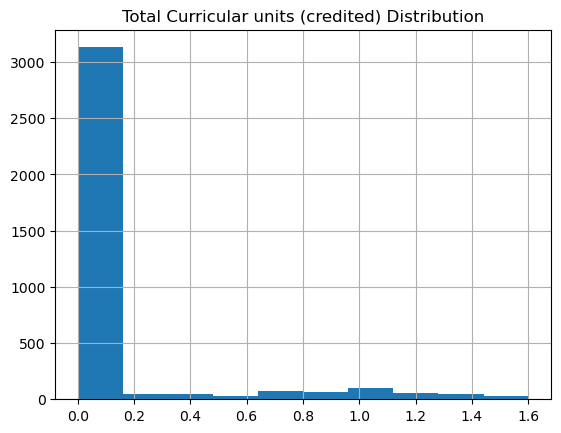

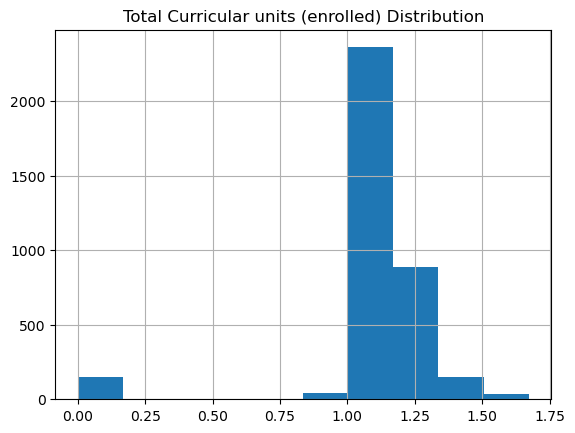

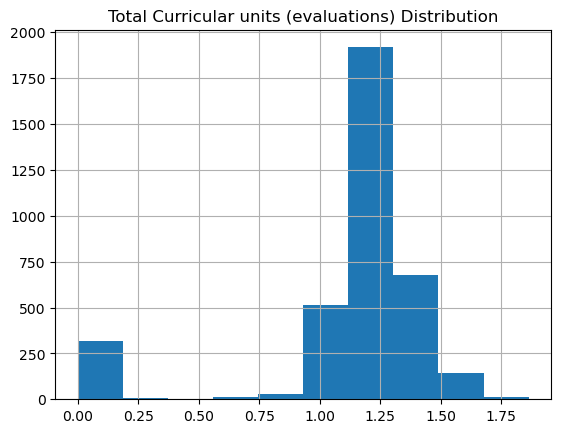

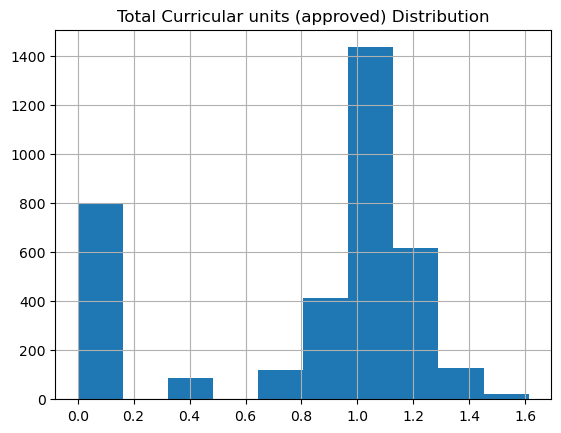

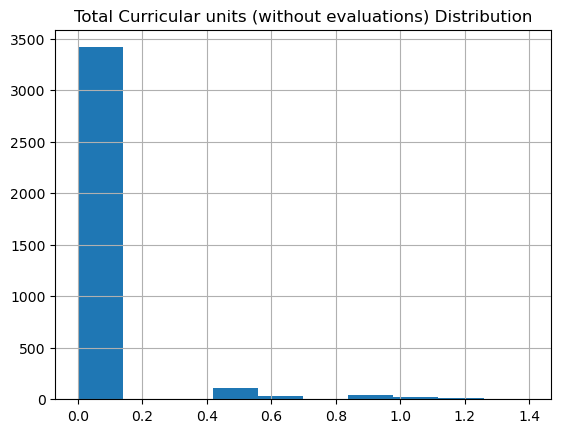

In [13]:

for n in code_num:
  school_df[n]=np.log10(school_df[n]+1)

for numeric in num:
    school_df[numeric].hist()
    plt.title(f'{numeric} Distribution')
    plt.show()

In [14]:
school_df['Admission grade'] = pd.cut(school_df['Admission grade'],bins=[0,130,150,170,190], labels=[10,20,30,40])
school_df['Previous qualification (grade)'] = pd.cut(school_df['Previous qualification (grade)'], bins=[0,130,150,170,190], labels=[10,20,30,40])

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
school_df[num] = scaler.fit_transform(school_df[num])

## Feature selection
1. Chisquare for filtering

In [16]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
school_df.drop('Target', axis=1, inplace=True)
X_columns = school_df.drop('Target_encoded', axis=1).columns
X= school_df.drop('Target_encoded',axis=1)
y= school_df['Target_encoded']

In [17]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=10)


cat= X.drop(num,axis=1)


# # Summarize scores
# np.set_printoptions(precision=3)
# # print(fit.scores_)

# features = test.fit_transform(cat,y)
# # Summarize selected features
# print(features[0:5,:])
cat

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International
0,0,7,5,1,1,0,0,12,9,5,9,1,0,0,1,1,0,0
1,0,5,1,10,1,0,0,0,2,3,3,1,0,0,0,1,0,0
2,0,0,5,4,1,0,0,21,26,9,9,1,0,0,0,1,0,0
3,0,7,2,14,1,0,0,22,26,5,3,1,0,0,1,0,0,0
4,1,11,1,2,0,0,0,21,27,9,9,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0,0,6,14,1,0,0,0,0,5,4,0,0,0,1,1,0,0
4420,0,0,2,14,1,0,18,0,0,9,9,1,0,1,0,0,0,1
4421,0,0,1,11,1,0,0,21,26,9,9,1,0,0,1,0,1,0
4422,0,0,1,8,1,0,0,21,26,7,4,1,0,0,1,0,1,0


2. Recursive Feature Elimination

In [18]:
# Feature extraction
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
model = DecisionTreeClassifier()
rfe = RFE(estimator=model, n_features_to_select=10)
fit = rfe.fit(X, y)
# print("Num Features: %s" % (fit.n_features_))
# print("Selected Features: %s" % (fit.support_))
# print("Feature Ranking: %s" % (fit.ranking_))
important_features = pd.DataFrame(list(zip(X_columns,fit.support_)),columns=['Feature','Important'])
important_features.sort_values(by='Important', ascending=False)

,Feature,Important
23,GDP,True
24,Total Curricular units (grade),True
19,Age at enrollment,True
11,Father's occupation,True
9,Father's qualification,True
16,Tuition fees up to date,True
26,Total Curricular units (enrolled),True
27,Total Curricular units (evaluations),True
3,Course,True
28,Total Curricular units (approved),True


In [19]:
X.isna().sum()

Marital status                                  0
Application mode                                0
Application order                               0
Course                                          0
Daytime/evening attendance                      0
Previous qualification                          0
Previous qualification (grade)                  0
Nationality                                     0
Mother's qualification                          0
Father's qualification                          0
Mother's occupation                             0
Father's occupation                             0
Admission grade                                 0
Displaced                                       0
Educational special needs                       0
Debtor                                          0
Tuition fees up to date                         0
Gender                                          0
Scholarship holder                              0
Age at enrollment                               0


In [20]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X,y)
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, random_state=None, solver='auto', tol=0.001)
# A helper method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)
print("Ridge model:", pretty_print_coefs(ridge.coef_))
print(school_df.columns)


Ridge model: -0.009 * X0 + 0.005 * X1 + 0.0 * X2 + 0.009 * X3 + 0.036 * X4 + -0.003 * X5 + 0.0 * X6 + 0.012 * X7 + 0.002 * X8 + -0.001 * X9 + -0.004 * X10 + -0.001 * X11 + 0.0 * X12 + 0.018 * X13 + 0.055 * X14 + 0.12 * X15 + -0.21 * X16 + 0.05 * X17 + -0.101 * X18 + 0.018 * X19 + -0.205 * X20 + 0.001 * X21 + -0.003 * X22 + -0.004 * X23 + 0.103 * X24 + 0.053 * X25 + 0.063 * X26 + 0.02 * X27 + -0.43 * X28 + 0.003 * X29
Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target_encoded',
       'Tota

Dimensional Reduction
1. PCA

In [21]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit_transform(X)
pca.n_components_

7

In [22]:
pca.explained_variance_ratio_

array([0.51214494, 0.14413924, 0.10686434, 0.08121862, 0.05959816,
       0.03389473, 0.01430332])

T-SNE

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


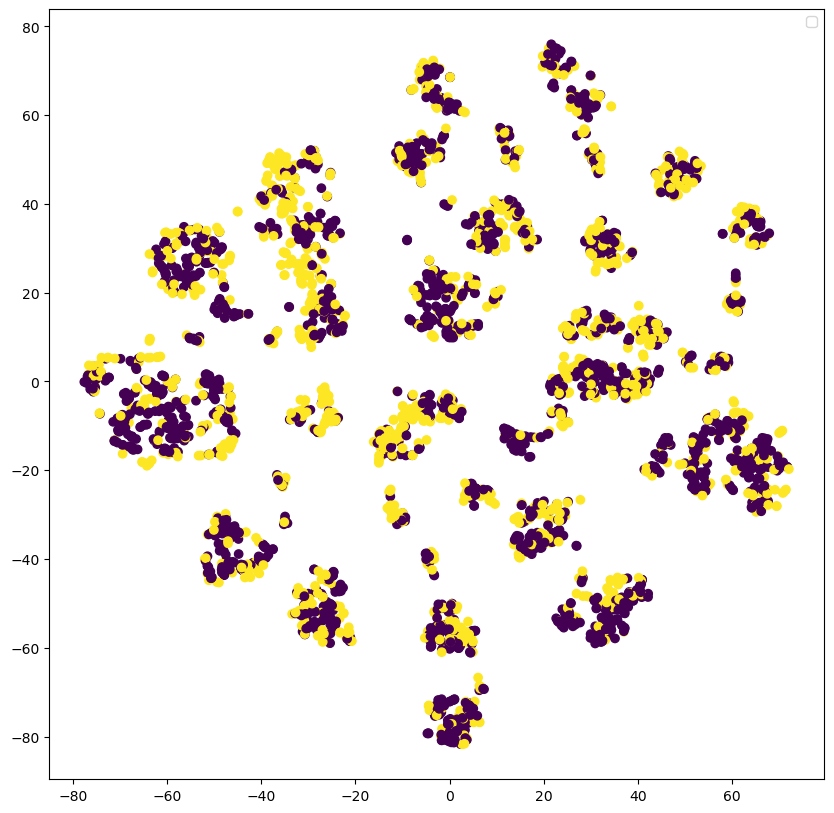

In [23]:
from sklearn.manifold import TSNE
tsne =TSNE(n_components=2,perplexity=20,random_state=42)
tsne_df = tsne.fit_transform(X)
fig = plt.figure(figsize=(10,10))
plt.scatter(tsne_df[:,0],tsne_df[:,1],c=y)
plt.legend()
plt.show()

In [24]:
school_df.to_csv('updated_data.csv')